<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/DecisionRegionExplanationDemoAnd_SVM_Demo_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv('iris.csv')

In [42]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [43]:
data.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [44]:

#Goal of this program is to show decision regions
#To plot decision regions, we will use mlxtend
#mlxtend expects the label data to be numeric (discrete numerical)
#pip install mlxtend

finalFeatures = data.iloc[:,[0,2]].values
finalLabels = data.variety.replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2]).values.ravel()

<ipython-input-44-b6cdc7a55acf>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finalLabels = data.variety.replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2]).values.ravel()


In [45]:
finalLabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(finalFeatures,finalLabels)

LogisticRegression()

In [47]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(finalFeatures,finalLabels)

DecisionTreeClassifier()

In [48]:
from sklearn.svm import SVC
model2 = SVC(kernel="linear", gamma=0)
model2.fit(finalFeatures,finalLabels)

SVC(gamma=0, kernel='linear')

In [49]:
from sklearn.svm import SVC
model3 = SVC(kernel="rbf")
model3.fit(finalFeatures,finalLabels)

SVC()

In [50]:
from sklearn.svm import SVC
model4 = SVC(kernel="poly")
model4.fit(finalFeatures,finalLabels)

SVC(kernel='poly')

<Axes: >

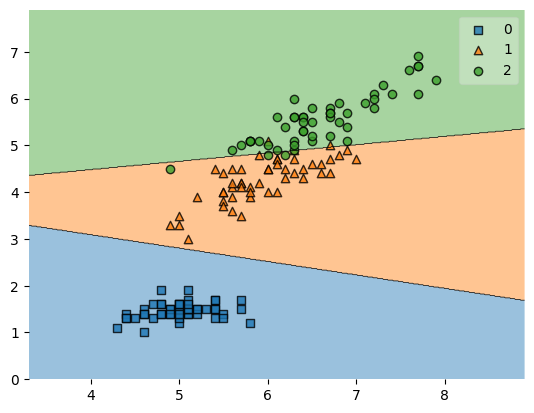

In [51]:
#use mlxtend to plot decision region

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model)

<Axes: >

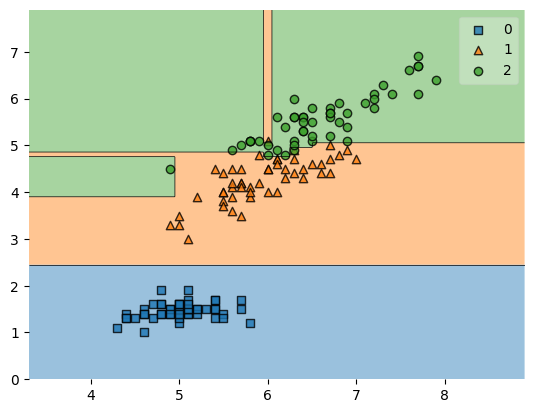

In [52]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model1)

<Axes: >

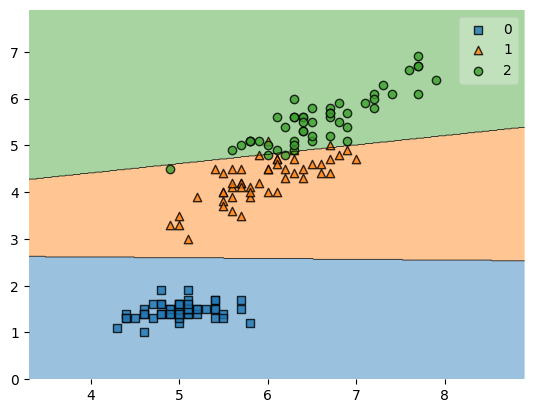

In [53]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model2)

<Axes: >

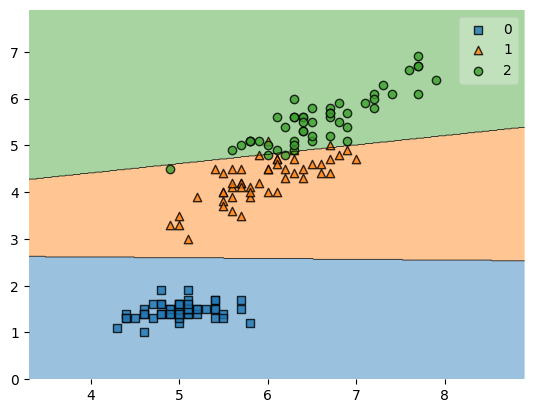

In [54]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model2)

<Axes: >

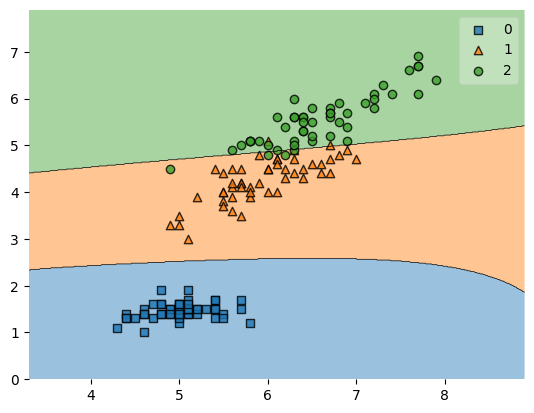

In [55]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model3)

<Axes: >

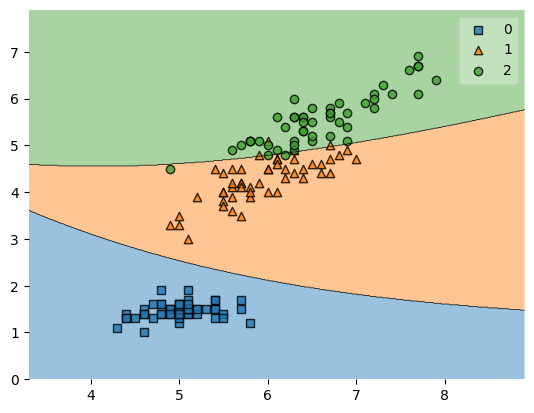

In [56]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model4)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model.predict(finalFeatures))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model1.predict(finalFeatures))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  1, 49]])

In [59]:
# Finding best features
# Use feature importance from DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

finalFeatures = data.iloc[:,[0,1,2,3]].values
finalLabels = data.variety.values.ravel()

model = DecisionTreeClassifier()
model.fit(finalFeatures,finalLabels)



DecisionTreeClassifier()

In [60]:
model.feature_importances_

array([0.02666667, 0.        , 0.05072262, 0.92261071])

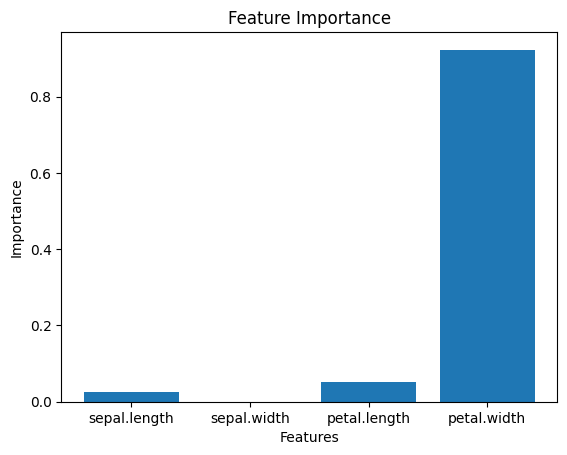

In [61]:
import matplotlib.pyplot as plt

featureImpDF = pd.DataFrame({
    'feature':['sepal.length','sepal.width','petal.length','petal.width'],
    'importance': model.feature_importances_
})

plt.bar(featureImpDF['feature'],featureImpDF['importance'])

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Apply SVM on Social Network Ads
# Identify which SVM kernel is providing less misclassification